# Model Evaluation Visualizations - Examples

- Viz 1: detect patterns in missclassifier vs correctly classified instances for ML algo
- Method: groupby value combinations for selected variable, than do a histogram of guesses vs non guesses

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
#Loading df1 after it has been augmented in iteration 2:
df = pd.read_pickle('../data/pickle_files/df_pickle_w_all_stats')

In [36]:
#Checking dtypes have loaded correctly (should return empty index)
df.select_dtypes(exclude = ['float64', 'int64']).columns

Index(['Date', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month_last_contact', 'day_of_week_last_contact', 'poutcome',
       'y', 'Government expenditure', 'Budget balance', 'Labor cost',
       'Government debt', 'Gross Domestic Product (GDP)',
       'Household consumption', 'Investment', 'Economic growth',
       'Consumption growth', 'Investment as percent of GDP',
       'Investment growth', 'Consumption as percent of GDP',
       'Economic growth Q-on-Q'],
      dtype='object')

In [37]:
df = df[(df['month'] > 3) & (df['month'] < 6) ]

In [38]:
df.shape

(16401, 75)

In [39]:
y = df['y']
X = df.drop(columns=['y', 'Date'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_pred = lr.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred)

0.9297986329207464

In [129]:
def set_misses(df, X_test, y_test, y_pred, grp_list):
    
    cols = df.columns
    X_t = pd.DataFrame(X_test, columns=cols)
    
    X_t['y_pred'] = y_pred
    X_t['y_test'] = y_test
    
    X_t['guess'] = [i==k for i,k in zip(y_pred, y_test)]
    X_t['miss'] = [i!=k for i,k in zip(y_pred, y_test)]
    
    cols_dfviz = grp_list + ['guess', 'miss']
    
    df_viz = X_t[cols_dfviz].groupby(by=grp_list).sum()
    
    return df_viz

In [135]:
def plot_classifications(df_viz):
    fig = plt.figure(figsize=(7,3))
    ax = fig.add_subplot(111) # Create matplotlib axes

    df_viz.guess.plot(kind='bar', width = 0.3, color='blue', position=1, ax=ax)
    df_viz.miss.plot(kind='bar', width = 0.3, color='red', position=0, ax=ax)
    
    xlables = '-'.join([i for i in df_viz.index.names])
    
    ax.set_ylabel('Count')
    ax.set_xlabel(xlables)
    #ax.set_xticks()
    ax.set_title('Classification Guesses vs Misses')
    ax.legend()

    plt.show()

In [145]:
print("Categorical Variables: ")
print(list(df.select_dtypes(include='int8').columns))

Categorical Variables: 
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month_last_contact', 'day_of_week_last_contact', 'poutcome', 'y']


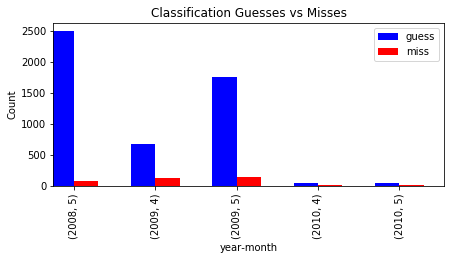

In [136]:
df_viz = set_misses(df, X_test, y_test, y_pred, ['year', 'month'])
plot_classifications(df_viz)

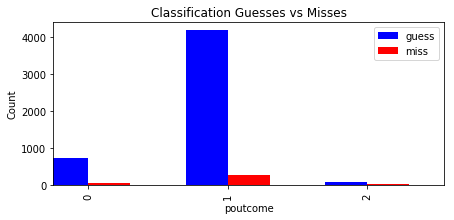

In [148]:
df_viz = set_misses(df, X_test, y_test, y_pred, ['poutcome'])
plot_classifications(df_viz)

- Viz 2: detect classifications vs misclassifications as a function of time
- Method: cumulative line plots